<a href="https://colab.research.google.com/github/annacfisher/project_gss/blob/main/group8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #1

## Machine Learning 1

### Summary:

### Results:

### Conclusion:

Ashley - marital status

Anna - age, happy

Semin - after life

Emily - income

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
! git clone https://github.com/annacfisher/project_gss

Cloning into 'project_gss'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 44 (delta 17), reused 8 (delta 5), pack-reused 22
Receiving objects: 100% (44/44), 24.19 MiB | 18.22 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [3]:
df = pd.read_csv('/content/project_gss/selected_gss_data.csv')

In [4]:
df.head()

,marital,postlife,age,happy,income
0,never married,NaN,23.0,not too happy,NaN
1,married,NaN,70.0,not too happy,NaN
2,married,NaN,48.0,pretty happy,NaN
3,married,NaN,27.0,not too happy,NaN
4,married,NaN,61.0,pretty happy,NaN


In [5]:
df.value_counts()

marital  postlife  age   happy          income            
married  yes       43.0  pretty happy   $25,000 or more       186
                   36.0  pretty happy   $25,000 or more       176
                   35.0  pretty happy   $25,000 or more       175
                   37.0  pretty happy   $25,000 or more       172
                   40.0  pretty happy   $25,000 or more       161
                                                             ... 
                   68.0  not too happy  $15,000 to $19,999      1
                   67.0  very happy     $7,000 to $7,999        1
                                        $5,000 to $5,999        1
                         pretty happy   $3,000 to $3,999        1
widowed  yes       89.0  very happy     under $1,000            1
Length: 8716, dtype: int64

In [ ]:
#cleaning age and happiness level

In [11]:
print(df.dtypes, '\n')

marital     object
postlife    object
age         object
happy       object
income      object
dtype: object 



In [12]:
df['age'].describe()

count     71623
unique       73
top        30.0
freq       1571
Name: age, dtype: object

In [13]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].describe() #after - only losing 2 data points


count    71621.000000
mean        46.555982
std         17.600417
min         18.000000
25%         32.000000
50%         44.000000
75%         60.000000
max         89.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

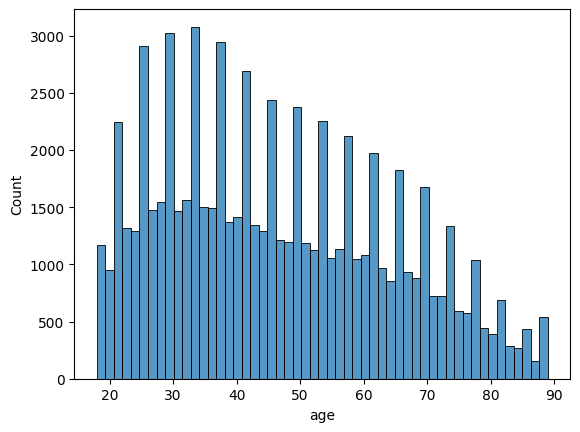

In [15]:
sns.histplot(df['age'])

In [20]:
df['happy'].value_counts()

#df['happy'].describe() #not all age observations have a happiness observation

pretty happy     37813
very happy       20385
not too happy     9390
happy                2
Name: happy, dtype: int64

In [ ]:
#only 2 people answered happy, and it's unclear where happy is in the rankings, so replace those values with NAN

In [21]:
df['happy'] = df['happy'].replace( 'happy', np.nan)

<Axes: >

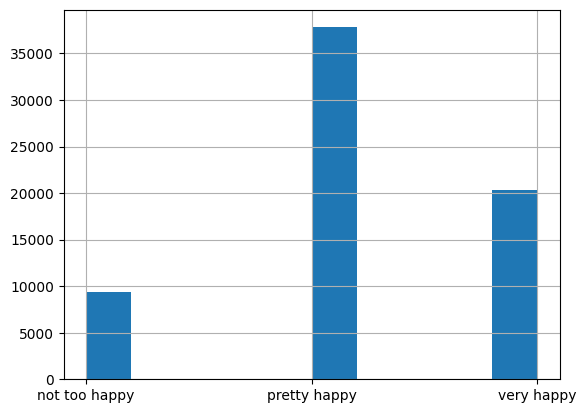

In [22]:
df["happy"].hist()
